In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
demand_data = pd.read_csv('data\dataset\demand.csv')
vehicle_data = pd.read_csv('data/dataset/vehicles.csv')
vehicle_fuels = pd.read_csv('data/dataset/vehicles_fuels.csv')
fuels_data = pd.read_csv('data/dataset/fuels.csv')
carbon_emissions_data = pd.read_csv('data/dataset/carbon_emissions.csv')
cost_profiles = pd.read_csv('data/dataset/cost_profiles.csv')

In [3]:
vehicle_data

,ID,Vehicle,Size,Year,Cost ($),Yearly range (km),Distance
0,BEV_S1_2023,BEV,S1,2023,187000,102000,D1
1,BEV_S1_2024,BEV,S1,2024,177650,102000,D1
2,BEV_S1_2025,BEV,S1,2025,168767,102000,D1
3,BEV_S1_2026,BEV,S1,2026,160329,102000,D2
4,BEV_S1_2027,BEV,S1,2027,152312,102000,D2
...,...,...,...,...,...,...,...
187,LNG_S3_2034,LNG,S3,2034,209208,73000,D4
188,LNG_S3_2035,LNG,S3,2035,215484,73000,D4
189,LNG_S3_2036,LNG,S3,2036,221948,73000,D4
190,LNG_S3_2037,LNG,S3,2037,228607,73000,D4


In [4]:
#cari feasible vehicle
yr = 2023
size = 'S1'
distance = 'D1'
demand_km = 869181

feasible_vehicle = vehicle_data.loc[(vehicle_data['Year'] == yr) & (vehicle_data['Size'] == size)]
if distance == 'D2':
    feasible_vehicle = feasible_vehicle.loc[feasible_vehicle['Distance'] != 'D1']
elif distance == 'D3':
    feasible_vehicle = feasible_vehicle.loc[(feasible_vehicle['Distance'] == 'D3') & (feasible_vehicle['Distance'] == 'D4')]
elif distance == 'D4':
    feasible_vehicle = feasible_vehicle.loc[(feasible_vehicle['Distance'] == 'D4')]
feasible_vehicle

,ID,Vehicle,Size,Year,Cost ($),Yearly range (km),Distance
0,BEV_S1_2023,BEV,S1,2023,187000,102000,D1
64,Diesel_S1_2023,Diesel,S1,2023,85000,102000,D4
128,LNG_S1_2023,LNG,S1,2023,100000,102000,D4


In [5]:
vehicle_used_fuel = pd.DataFrame({})

for veh_id in feasible_vehicle['ID']:
    vehicle_used_fuel = pd.concat([vehicle_used_fuel,vehicle_fuels.loc[vehicle_fuels['ID'] == veh_id]])
vehicle_used_fuel

,ID,Fuel,Consumption (unit_fuel/km)
0,BEV_S1_2023,Electricity,0.893043
16,Diesel_S1_2023,B20,0.223016
32,Diesel_S1_2023,HVO,0.223016
48,LNG_S1_2023,LNG,0.165507
64,LNG_S1_2023,BioLNG,0.165159


C:\Users\asus\AppData\Local\Temp\ipykernel_19712\625084029.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


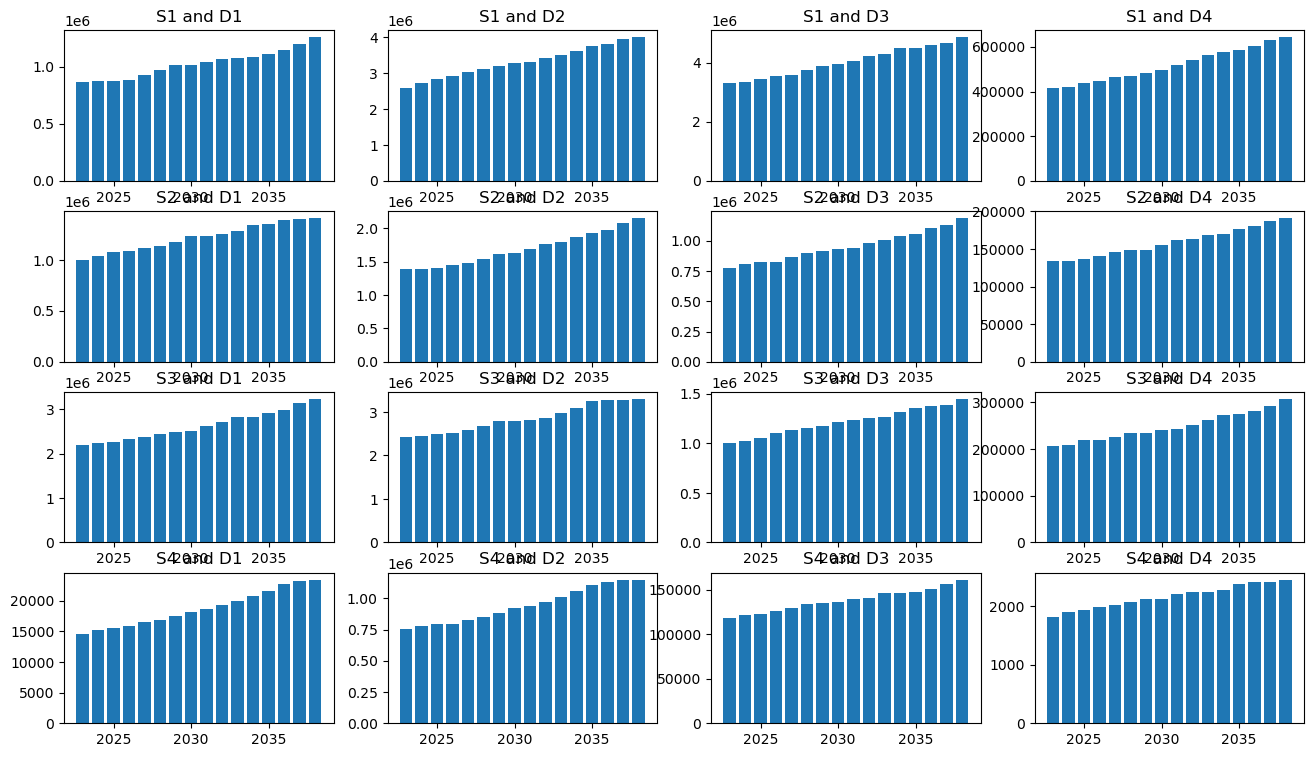

In [11]:
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(16,9)

s = ['S1','S2','S3','S4']
d = ['D1','D2','D3','D4']
for i in range(4):
    for j in range(4):
        temp_df = demand_data.loc[(demand_data['Size'] == s[i]) & (demand_data['Distance'] == d[j])]
        axs[i,j].bar(temp_df['Year'], temp_df['Demand (km)'])
        axs[i,j].set_title(s[i] + ' and ' + d[j])
fig.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_19712\1871261366.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


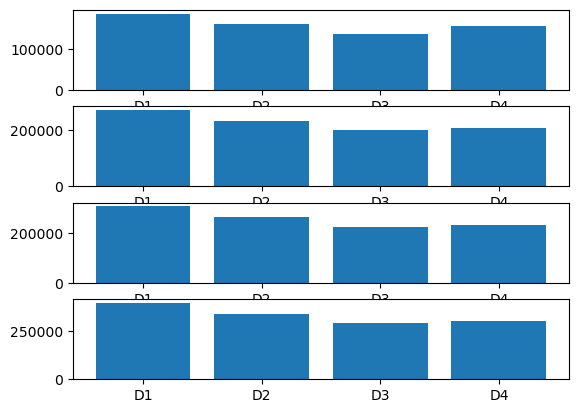

In [13]:
fig2, axs2 = plt.subplots(4)
for i in range(4):
    temp_df = vehicle_data.loc[vehicle_data['Size'] == s[i]]
    axs2[i].bar(temp_df['Distance'], temp_df['Cost ($)'])

fig2.show()

In [14]:
vehicle_fuels

,ID,Fuel,Consumption (unit_fuel/km)
0,BEV_S1_2023,Electricity,0.893043
1,BEV_S1_2024,Electricity,0.893043
2,BEV_S1_2025,Electricity,0.893043
3,BEV_S1_2026,Electricity,0.893043
4,BEV_S1_2027,Electricity,0.868161
...,...,...,...
315,LNG_S3_2034,BioLNG,0.155192
316,LNG_S3_2035,BioLNG,0.155192
317,LNG_S3_2036,BioLNG,0.155192
318,LNG_S3_2037,BioLNG,0.155192


In [27]:
vehicle_fuels

,ID,Fuel,Consumption (unit_fuel/km)
0,BEV_S1_2023,Electricity,0.893043
1,BEV_S1_2024,Electricity,0.893043
2,BEV_S1_2025,Electricity,0.893043
3,BEV_S1_2026,Electricity,0.893043
4,BEV_S1_2027,Electricity,0.868161
...,...,...,...
315,LNG_S3_2034,BioLNG,0.155192
316,LNG_S3_2035,BioLNG,0.155192
317,LNG_S3_2036,BioLNG,0.155192
318,LNG_S3_2037,BioLNG,0.155192


In [28]:
arr_cost_fuel = []
arr_fuel = []
for i in range(len(vehicle_data['ID'])):
    id = vehicle_data['ID'].iloc[i]
    fuel = vehicle_fuels.loc[vehicle_fuels['ID'] == id]['Fuel'].iloc[0]
    temp_df = fuels_data.loc[fuels_data['Fuel'] == fuel]
    temp_df2 = vehicle_fuels.loc[(vehicle_fuels['ID'] == id) & (vehicle_fuels['Fuel'] == fuel)].iloc[0]
    avg_cost = np.average(temp_df['Cost ($/unit_fuel)'])
    avg_consumption = np.average(temp_df2['Consumption (unit_fuel/km)'])
    arr_cost_fuel.append(vehicle_data['Yearly range (km)'].iloc[i]*avg_cost*avg_consumption)
    arr_fuel.append(fuel)

In [29]:
vehicle_data['fuel'] = arr_fuel
vehicle_data['fuel_cost'] = arr_cost_fuel

In [30]:
vehicle_data.to_csv('vehicle_data.csv')

In [31]:
import plotly.graph_objects as go

In [38]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=1,subplot_titles=("S1", "S2", "S3", "S4"))

for i in range(4):
    temp_df = vehicle_data.loc[(vehicle_data['Size'] == s[i])]
    fig.add_trace(go.Bar(
        x=temp_df.loc[temp_df['Vehicle'] == 'BEV']['Year'],
        y=temp_df.loc[temp_df['Vehicle'] == 'BEV']['Cost ($)'],
        name='BEV'
    ),i+1,1)
    fig.add_trace(go.Bar(
        x=temp_df.loc[temp_df['Vehicle'] == 'LNG']['Year'],
        y=temp_df.loc[temp_df['Vehicle'] == 'LNG']['Cost ($)'],
        name='LNG'
    ),i+1,1)
    fig.add_trace(go.Bar(
        x=temp_df.loc[temp_df['Vehicle'] == 'Diesel']['Year'],
        y=temp_df.loc[temp_df['Vehicle'] == 'Diesel']['Cost ($)'],
        name='Diesel'
    ),i+1,1)
fig.show()

fig.update_layout(height=10, width=20)